# Run sentence embeddings on Bencini and Goldberg (2000) stimuli

In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import torch
from collections import defaultdict
import random
import math
import pickle
import sklearn.decomposition

import src.sent_encoder

%matplotlib inline
%load_ext autoreload
%autoreload 2
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [2]:
df = pd.read_csv("../data/bencini-goldberg.csv")

In [3]:
enc = src.sent_encoder.SentEncoder()

In [4]:
all_tokens, all_vecs = enc.contextual_token_vecs(df.sentence.tolist())

In [5]:
sent_vecs = [tok_vecs.sum(axis=0) for tok_vecs in all_vecs]

In [6]:
# Should be 16 (sentences) x 13 (layers) x 768
print(len(sent_vecs))
print(sent_vecs[0].shape)

16
(13, 768)


## PCA plot (dim=2)

In [7]:
layer = 11
pca_model = sklearn.decomposition.PCA(n_components=2)
pca_vecs = pca_model.fit_transform(np.array(sent_vecs)[:, layer])

In [8]:
pca_vecs.shape

(16, 2)

In [9]:
df['PC1'] = pca_vecs[:, 0]
df['PC2'] = pca_vecs[:, 1]

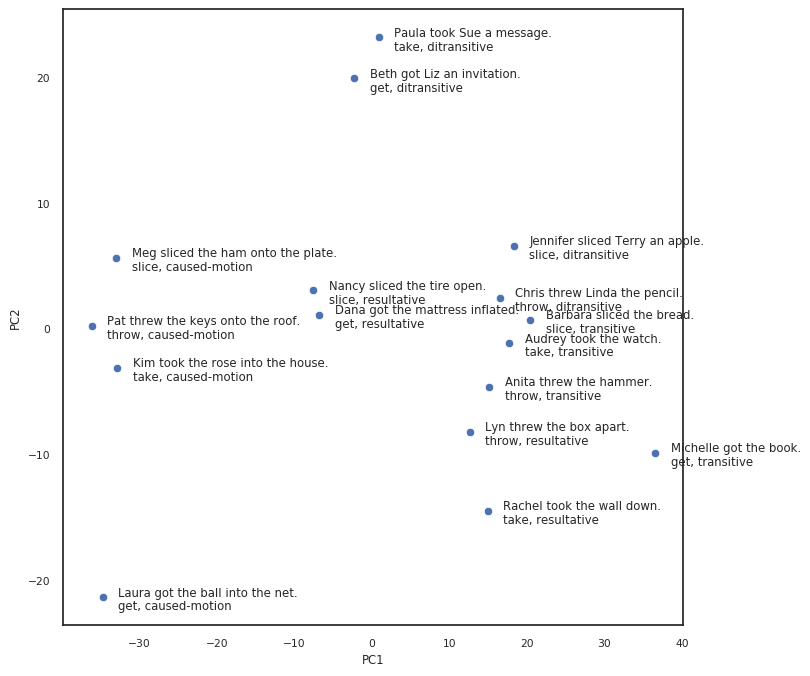

In [13]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.set(font_scale=0.7)
sns.set_style('white')
g = sns.scatterplot(x=df.PC1, y=df.PC2)
for _, row in df.iterrows():
  label_text = f"{row.sentence}\n{row.verb}, {row.construction}"
  g.text(row['PC1'] + 2, row['PC2'] - 1, label_text)
plt.show()

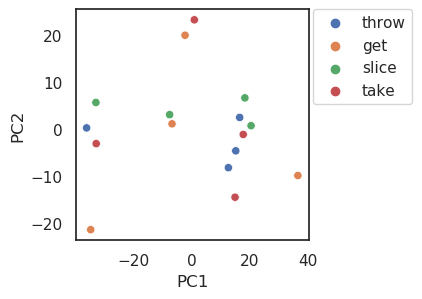

In [11]:
matplotlib.rc_file_defaults()
sns.set(rc={'figure.figsize':(3, 3)})
sns.set_style('white')
sns.scatterplot(x=df.PC1, y=df.PC2, hue=df.verb)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

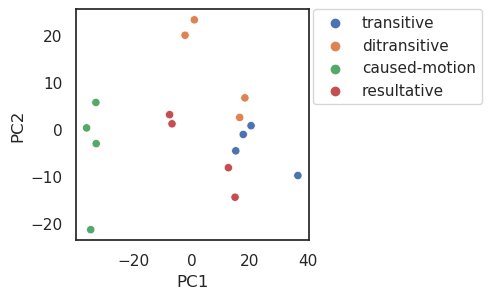

In [12]:
matplotlib.rc_file_defaults()
sns.set(rc={'figure.figsize':(3, 3)})
sns.set_style('white')
sns.scatterplot(x=df.PC1, y=df.PC2, hue=df.construction)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()